# Image Shadow Maker
In the following project we will add a shadow to a given image by using linear transformations (particularly shear transformation).

## Import necessary libraies

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Read Image
Read an image from a given directory and save it to a variable.

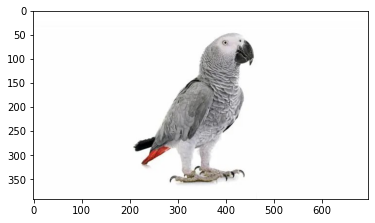

In [3]:
img = mpimg.imread("images/part2.jpg")
plt.imshow(img)

## Add a Gray Margin
Add a gray margin by making a whole new image with larger width/height and color those new pixels gray.

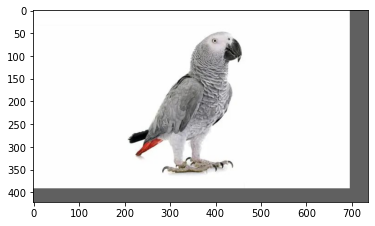

In [34]:
EXTENDED_PIXEL_WIDTH = 30
EXTENDED_PIXEL_HEIGHT = 40
MARGIN_RGB_COLOR = [96, 96, 96]

marginalized_img = np.zeros((img.shape[0] + EXTENDED_PIXEL_WIDTH, img.shape[1] + EXTENDED_PIXEL_HEIGHT, 3), dtype=int)
marginalized_img[:, :] = np.array(MARGIN_RGB_COLOR)
marginalized_img[:img.shape[0], :img.shape[1]] = img
plt.imshow(marginalized_img)

## Apply Shear Transformation
Apply shear transformation to the marginalized image by multiplying a matrix like `[[1, 0, 0], [ß, 1, 0], [0, 0, 1]]` to the computed image.

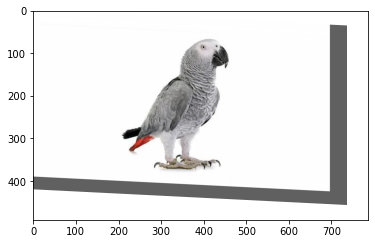

In [167]:
import matplotlib.transforms as mtransforms

SHEAR_COEFFICIENT = 0.05
transformation_matrix = mtransforms.Affine2D.from_values(1, SHEAR_COEFFICIENT, 0, 1, 0, 0)

def shear_image(ax, image):
    im = ax.imshow(image)
    
    trans_data = transformation_matrix + ax.transData
    im.set_transform(trans_data)

    ax.set_ylim(image.shape[0] + 70, 0)
    ax.set_xlim(0, image.shape[1] + 50)

    
fix, (img_ax) = plt.subplots(1, 1)
shear_image(img_ax, marginalized_img)
plt.show()